# How to display an image with scientifically meaningful axes in Python



## Setup
Import the necessary libraries

In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt

Explicitly define a publicly accessible path to the data files so that this notebook will be portable.

In [2]:
data_path = "https://github.com/dawg-at-irya/fits-image-axes-talk/raw/main/data/"

## Case with an implicit pixel-to-world transformation

We will use a two dimensional image from a numerical simulation, which we load from a FITS file. But this image data might come from anywhere. 



In [3]:
hdulist = fits.open(data_path + "large-image-no-wcs.fits")
hdulist.info()

Filename: /root/.astropy/cache/download/url/0969bc74e9741a4ccd88ddc335594ae0/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (512, 512)   float32   


The image is 512 by 512 pixels

In [4]:
im = hdulist[0].data

We can display the image with matplotlib's `imshow`, which by default uses pixel units.  

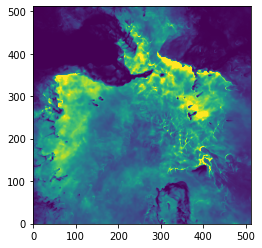

In [36]:
fig, ax = plt.subplots()
ax.imshow(im, origin="lower", vmax=2e6)
# Note that we use origin="lower" so the image is not inverted
...;

However, we want to show the axes in physical length coordinates. We have the following tacit knowledge:

1.   The simulation represents a box of side 4 parsec
2.   The origin is in the center of the box

For a simple case like this, we can add the keyword `extent=[left, right, bottom, top]`. 

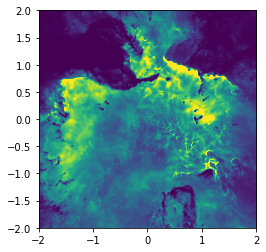

In [33]:
width, height = 4.0, 4.0
left, right = -width/2, width/2
bottom, top = -height/2, height/2
fig, ax = plt.subplots()
ax.imshow(im, extent=[left, right, bottom, top], origin="lower", vmax=2e6)
...;

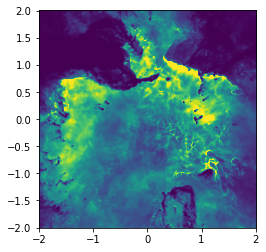

In [7]:
ny, nx = im.shape
width, height = 4.0, 4.0
dx, dy = width / nx, height / ny
x1, x2 = -(width + dx) / 2, (width + dx) / 2
y1, y2 = -(height + dy) / 2, (height + dy) / 2
fig, ax = plt.subplots()
ax.imshow(im, extent=[x1, x2, y1, y2], origin="lower", vmax=2e6)
...;

## Case where WCS transformation comes from FITS header

## Using the WCS transfomation

In [8]:
from astropy.wcs import WCS

In [9]:
w = WCS(hdulist[0])

In [10]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 512  512

In [11]:
w.wcs.cdelt = dx, dy
w.wcs.crpix = (nx + 1) / 2, (ny + 1) / 2
w.wcs.cunit = "pc", "pc"

In [12]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 256.5  256.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.0078125  0.0078125  
NAXIS : 512  512

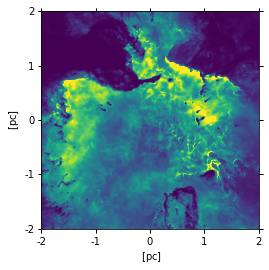

In [27]:
(   # Example of "chaining" style
    plt
    .figure()
    .add_subplot(projection=w)
    .imshow(im, vmax=2e6)
    # This is all a single expression 
);

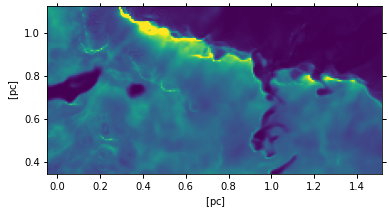

In [32]:
window = slice(300, 400), slice(250, 450)
fig, ax = plt.subplots(
    subplot_kw=dict(projection=w.slice(window)),
)
ax.imshow(im[window], vmax=4e6)
...;